# Ensemble Methods

# Voting Classifiers 

`Ensemble methods works best when the predictors are as independant from one another as possible`

***This is why we focus much on diversity of classifiers (i.e algos used) effectivly reducing the chances of correlated errors by some margin***

In [3]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier , VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import BaggingClassifier ,ExtraTreesClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
import numpy as np


In [4]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [5]:
X,y = make_moons(n_samples=500,noise=0.30,random_state=42)
X_tr , X_ts, y_tr , y_ts = train_test_split(X,y,random_state=42) # not using test set maybe cuh this is just an example
voting_clf = VotingClassifier([
    ('lr',LogisticRegression(random_state=42)),
    ('Rf',RandomForestClassifier(random_state=42)),
    ('svc',SVC(random_state=42))
])


voting_clf.fit(X_tr,y_tr)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('Rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [6]:
for i ,clf in voting_clf.named_estimators_.items():
    print(i ,"=",clf.score(X_ts,y_ts))  # here we checked the accuracy of each individual model on the preds.... where i,clf enumurate in the name defined by us during pipelinging and the classifiers associated with it.... also '_' shows these are clones

lr = 0.864
Rf = 0.896
svc = 0.896


In [7]:
# calling predict methods perform hard voting 
print(voting_clf.predict(X_ts[:1]))
# now to check what the clones did 
print([clf.predict(X_ts[:1]) for clf in voting_clf.estimators_])
# checks out our definition of majority voting 

[1]
[array([1], dtype=int64), array([1], dtype=int64), array([0], dtype=int64)]


In [8]:
# performance on test set 
voting_clf.score(X_ts,y_ts)
# match this with the scores above and it is a massive improvemnt 

0.912

In [9]:
# adjusting within the already made voting_clf 
# make sure to make change in MAIN not in clones as it'll not reflect the other way around
voting_clf.voting ="soft"
voting_clf.named_estimators["svc"].probability = True
voting_clf.fit(X_tr,y_tr)
voting_clf.score(X_ts,y_ts)

# 92% acc

0.92

# Bagging and Pasting 

In [10]:
# training 500 trees over a replacable sample so BAGGING
bag_clf = BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,max_samples=100,n_jobs=-1,random_state=42)
bag_clf.fit(X_tr,y_tr)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, random_state=42)

In [11]:
# testing acc over test set 
bag_clf.score(X_ts,y_ts)
# clearly at the current setup Voting clf is better now what if we try with pating 

0.904

In [12]:
# training 500 trees over a replacable sample so BAGGING
bag_clf_p = BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,max_samples=100,n_jobs=-1,bootstrap=False,random_state=42)
bag_clf_p.fit(X_tr,y_tr)

BaggingClassifier(bootstrap=False, estimator=DecisionTreeClassifier(),
                  max_samples=100, n_estimators=500, n_jobs=-1,
                  random_state=42)

In [13]:
bag_clf_p.score(X_ts,y_ts)
# pasting clears lmao 

0.92

Text(0, 0.5, '')

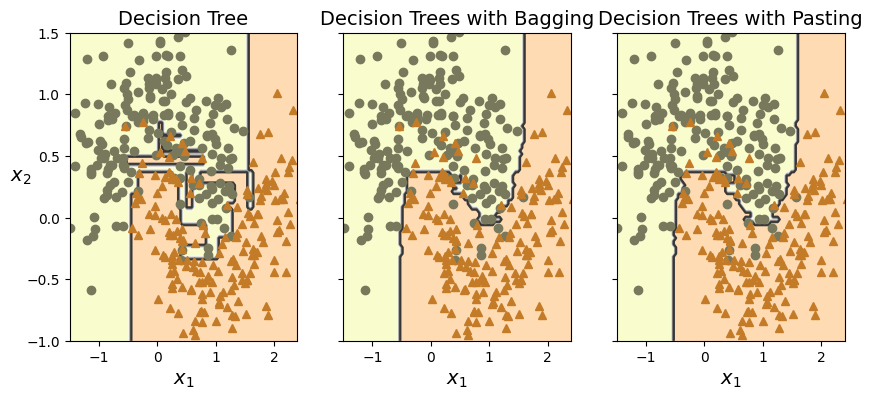

In [14]:
# Copying code from the book to visualise 
# extra code – this cell generates and saves Figure 7–5

def plot_decision_boundary(clf, X, y, alpha=1.0):
    axes=[-1.5, 2.4, -1, 1.5]
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    plt.contourf(x1, x2, y_pred, alpha=0.3 * alpha, cmap='Wistia')
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8 * alpha)
    colors = ["#78785c", "#c47b27"]
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_tr, y_tr)

fig, axes = plt.subplots(ncols=3, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X_tr, y_tr)
plt.title("Decision Tree")
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X_tr, y_tr)
plt.title("Decision Trees with Bagging")
plt.ylabel("")
plt.sca(axes[2])
plot_decision_boundary(bag_clf_p, X_tr, y_tr)
plt.title("Decision Trees with Pasting")
plt.ylabel("")


`Decision boundary is less irregular (which is a plus tbh) but as stated the bias is roughly similar check the area under the curve to get an idea`

In [15]:
tree_clf.score(X_ts,y_ts)
# lmao noob

0.856

# OOB eval

In [16]:
bag_clf_oob = BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,oob_score=True,random_state=42,n_jobs=-1)
bag_clf_oob.fit(X_tr,y_tr)
bag_clf_oob.oob_score_
# so it states that our clf is likely to achieve *9.6 acc 

0.896

In [17]:
# checking acc 
bag_clf_oob.score(X_ts,y_ts)
# more than oob_score noice 

0.92

In [18]:
#The OOB decision function for each training instance is also available through the oob_decision_function_ attribute.
bag_clf_oob.oob_decision_function_[:3]
# since DT has proba method it returns class probabilities for each instances 

array([[0.32352941, 0.67647059],
       [0.3375    , 0.6625    ],
       [1.        , 0.        ]])

# Random Forest
`More optimisied version of Bagging ensemble over DTs`

In [19]:
Rf_clf = RandomForestClassifier(n_estimators=500,random_state=42,n_jobs=-1,max_leaf_nodes=16)
Rf_clf.fit(X_tr,y_tr)
Rf_clf.score(X_ts,y_ts)

0.912

In [20]:
# comparing with bagging classifier   !!!! we deliberately made the DTs to match Rf
bag_clf_rf = BaggingClassifier(DecisionTreeClassifier(max_features="sqrt",max_leaf_nodes=16),n_estimators=500,n_jobs=-1,random_state=42)
bag_clf_rf.fit(X_tr,y_tr)
bag_clf_rf.score(X_ts,y_ts)

0.912

In [46]:
# extra tree classifier 
ex_t_clf = ExtraTreesClassifier(n_estimators=500,n_jobs=-1,random_state=42,max_leaf_nodes=20)
ex_t_clf.fit(X_tr,y_tr)

ex_t_clf.score(X_ts,y_ts)

0.912

`It is hard to tell in advance whether a RandomForestClassifier will perform better or worse
than an ExtraTreesClassifier. Generally, the only way to know is to try both and compare
them using cross-validation.`

In [47]:
# features importance on iris dataset
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
Rf_clf_FI = RandomForestClassifier(n_estimators=500,random_state=42)
Rf_clf_FI.fit(iris.data,iris.target)


RandomForestClassifier(n_estimators=500, random_state=42)

In [48]:
for score , name in zip(Rf_clf_FI.feature_importances_,iris.data.columns):
    print(name,round(score,2))

sepal length (cm) 0.11
sepal width (cm) 0.02
petal length (cm) 0.44
petal width (cm) 0.42


In [50]:
# trying to rerplicate the heatmap of MNIST image dataset 
from sklearn.datasets import fetch_openml
X_m , y_m = fetch_openml("mnist_784",return_X_y=True, as_frame=False,parser="auto")
rf_mnist = RandomForestClassifier(n_estimators=200,random_state=42)

rf_mnist.fit(X_m,y_m)

RandomForestClassifier(n_estimators=200, random_state=42)

(-0.5, 27.5, 27.5, -0.5)

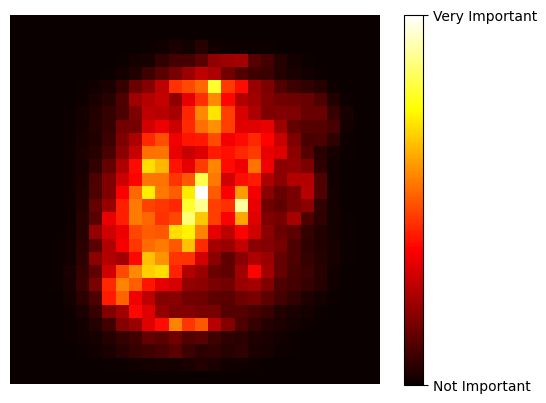

In [57]:
heatmap_image = rf_mnist.feature_importances_.reshape(28,28)
plt.imshow(heatmap_image,cmap="hot")

cbar = plt.colorbar(ticks=[rf_mnist.feature_importances_.min(),
                           rf_mnist.feature_importances_.max()])
cbar.ax.set_yticklabels(["Not Important","Very Important"])
plt.axis("off")

# so as we know from lookiing at images most of data is generally in the center 

(-0.5, 27.5, 27.5, -0.5)

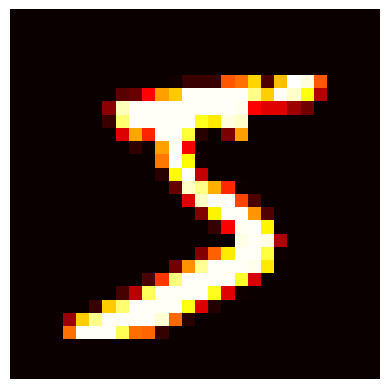

In [61]:
num_image = X_m[:1].reshape(28,28)
plt.imshow(num_image,cmap="hot")
plt.axis("off")
# mastches with above